# OpenCV

In [23]:
# pip install pysaliency

In [1]:
# saliency map
import cv2
import matplotlib.pyplot as plt

# 입력 영상 로드
image = cv2.imread('content/frame_0050.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB로 변환

# 살리언시 맵 생성기 초기화
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

# 살리언시 맵 계산
(success, saliencyMap) = saliency.computeSaliency(image)

# 살리언시 맵을 이진화
saliencyMap = (saliencyMap * 255).astype("uint8")

# 결과 표시
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image)
ax1.set_title("Image")
ax1.axis("off")

ax2.imshow(saliencyMap, cmap='gray')
ax2.set_title("Saliency Map")
ax2.axis("off")

plt.show()

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

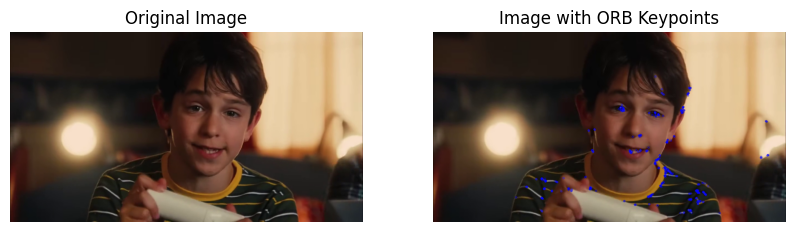

In [25]:
# 특징점
import cv2
import matplotlib.pyplot as plt

# 입력 영상 로드
image = cv2.imread('content/frame_0050.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB로 변환

# ORB 특징점 검출기 초기화
orb = cv2.ORB_create()

# 특징점 검출
keypoints = orb.detect(image, None)

# 특징점 그리기
image_with_keypoints = cv2.drawKeypoints(image_rgb, keypoints, None, color=(0, 0, 255))

# 결과 표시
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image_rgb)
ax1.set_title("Original Image")
ax1.axis("off")

ax2.imshow(image_with_keypoints)
ax2.set_title("Image with ORB Keypoints")
ax2.axis("off")

plt.show()

# DeepGaze IIE

In [26]:
import torch
import deepgaze_pytorch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

/home/bok20/mediapipe/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bok20/mediapipe/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
import numpy as np
from PIL import Image
from scipy.ndimage import zoom
from scipy.special import logsumexp

# 이미지를 불러옵니다.
image_path = 'content/frame_0050.png'  # 여기에 자신의 이미지 경로를 입력하세요.
image = Image.open(image_path)
image = image.resize((1024, 768))  # 필요에 따라 이미지를 리사이즈합니다.
image = np.array(image)

# load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
# centerbias 다운로드: https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
# alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
centerbias_template = np.load('centerbias_mit1003.npy')
# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)
# 이미지를 NumPy 배열로 변환한 후 텐서로 변환
image_np = np.array([image.transpose(2, 0, 1)])
image_tensor = torch.tensor(image_np).to(DEVICE)

centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

log_density_prediction = model(image_tensor, centerbias_tensor)

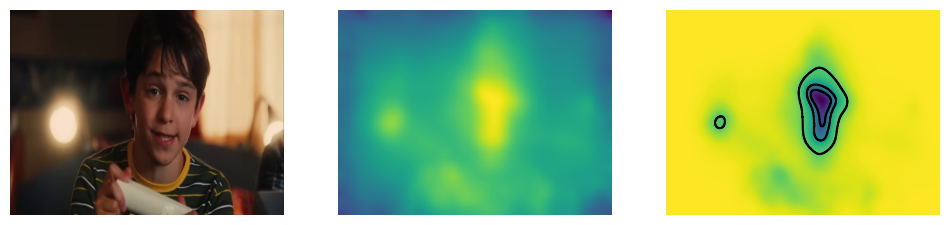

In [ ]:
import matplotlib.pyplot as plt
from pysaliency.plotting import visualize_distribution

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axs[0].imshow(image)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].set_axis_off()
visualize_distribution(log_density_prediction.detach().cpu().numpy()[0, 0], ax=axs[2])
axs[2].set_axis_off()

# DeepGaze III

In [2]:
import deepgaze_pytorch
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

Using cache found in /home/bok20/.cache/torch/hub/pytorch_vision_v0.6.0
/home/bok20/mediapipe/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bok20/mediapipe/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


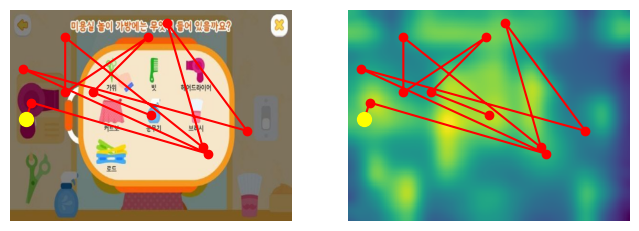

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.ndimage import zoom
from scipy.special import logsumexp

# 이미지를 불러옵니다.
image_path = 'b.jpg'  # 여기에 자신의 이미지 경로를 입력하세요.
image = Image.open(image_path)
image = image.resize((1024, 768))  # 필요에 따라 이미지를 리사이즈합니다.
image = np.array(image)

# 이미지의 초기 고정부터 시작하여 x 및 y(픽셀 좌표)의 이전 스캔 경로 고정 위치
fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700, 571, 861, 45, 718, 77, 58])
fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500, 49, 440, 214, 523, 337, 398])

# load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
# centerbias 다운로드: https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
# alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
centerbias_template = np.load('centerbias_mit1003.npy')
# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)

image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).to(DEVICE)

log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs[0].imshow(image)
axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[1].set_axis_off()

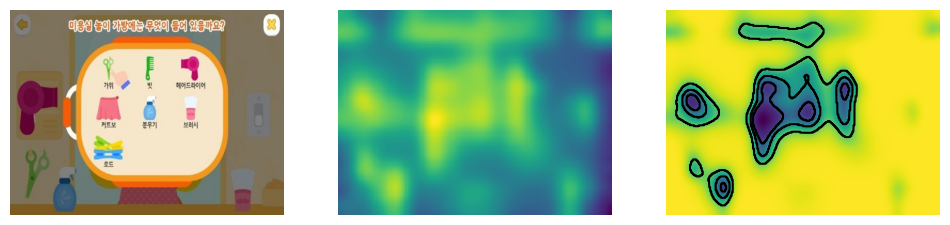

In [ ]:
import matplotlib.pyplot as plt
from pysaliency.plotting import visualize_distribution

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axs[0].imshow(image)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].set_axis_off()
visualize_distribution(log_density_prediction.detach().cpu().numpy()[0, 0], ax=axs[2])
axs[2].set_axis_off()